In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import spotipy
from spotipy.oauth2 import SpotifyOAuth
import seaborn as sns; sns.set()
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id='da06919089954d6395139775f24cc770',client_secret='7b718f878b094f08bf945cb9663bbbb3',redirect_uri='http://127.0.0.1:9090', scope='user-top-read',username='jwhandley'))

sp.current_user()

{'country': 'GB',
 'display_name': 'jwhandley',
 'email': 'jwhandley17@gmail.com',
 'explicit_content': {'filter_enabled': False, 'filter_locked': False},
 'external_urls': {'spotify': 'https://open.spotify.com/user/jwhandley'},
 'followers': {'href': None, 'total': 1},
 'href': 'https://api.spotify.com/v1/users/jwhandley',
 'id': 'jwhandley',
 'images': [],
 'product': 'premium',
 'type': 'user',
 'uri': 'spotify:user:jwhandley'}

In [7]:
track = sp.audio_analysis('3CMVjlbvNJMHDfYPX7xCpi')

In [19]:
index = [track['segments'][i]['start'] for i in range(len(track['segments']))]
pitch = [track['segments'][i]['pitches'] for i in range(len(track['segments']))]

pitches = pd.DataFrame(pitch,index=index,columns=['C','C#','D','D#','E','F','F#','G','G#','A','A#','B'])
pitches.head()

,C,C#,D,D#,E,F,F#,G,G#,A,A#,B
0.00000,0.747,0.765,0.750,0.753,0.827,0.984,1.000,0.907,0.806,0.607,0.448,0.281
0.48621,0.051,0.013,0.233,1.000,0.393,0.012,0.004,0.005,0.002,0.001,0.005,0.058
0.74844,0.005,0.014,0.185,1.000,0.194,0.003,0.002,0.004,0.001,0.000,0.009,0.010
1.05986,0.159,1.000,0.035,0.176,0.049,0.012,0.040,0.106,0.055,0.054,0.059,0.019
1.20358,0.086,0.161,0.447,1.000,0.240,0.024,0.009,0.088,0.010,0.012,0.142,0.055


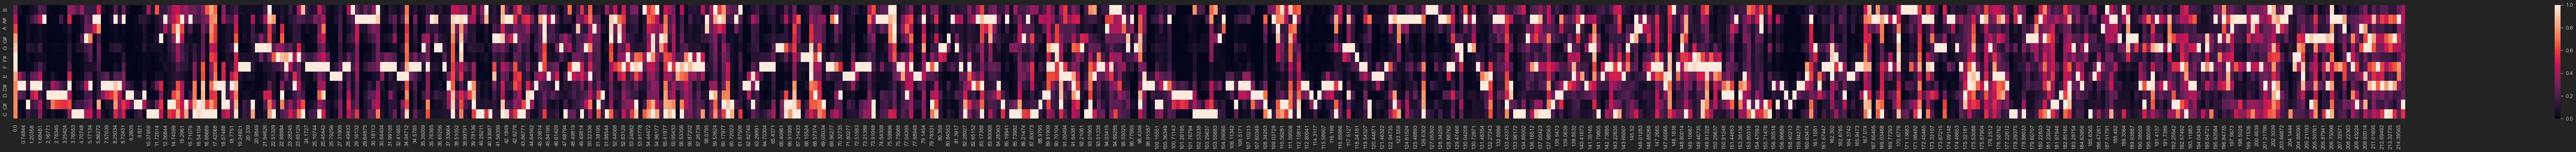

In [25]:
plt.figure(figsize=(128,5))
ax = sns.heatmap(pitches.T)
ax.invert_yaxis()